# Feature Engineering for Image Data

In [1]:
# Import necessary dependencies and settings
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
%matplotlib inline

/export/home/aaescore/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import os
os.chdir('/sasdata/corpid/a589565/Reinforcement Learning/Practical_machine_learning_with_python_P321/data')

In [3]:
import sys
sys.path = ['/sasdata/corpid/a589565/conda'] + sys.path

import os
os.environ['KERAS_BACKEND']="theano"

In [4]:
import keras
keras.__version__

Using Theano backend.


'2.1.2'

In [5]:
# Raw Image and channel pixel value
cat = io.imread('cat.png')
dog = io.imread('dog.png')
df = pd.DataFrame(['Cat', 'Dog'], columns=['Image'])
print(cat.shape, dog.shape)

((168, 300, 3), (168, 300, 3))


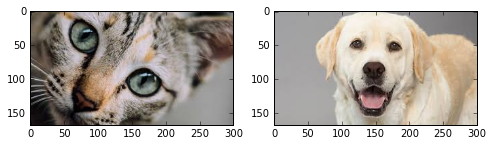

In [6]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat)
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog)

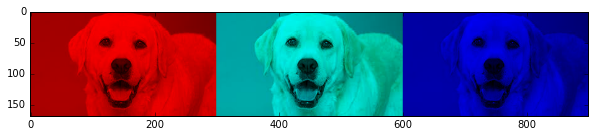

In [7]:
dog_r = dog.copy() # Red Channel
dog_r[:,:,1] = dog_r[:,:,2] = 0 # set G,B pixels = 0
dog_g = dog.copy() # Green Channel
dog_g[:,:,0] = dog_r[:,:,2] = 0 # set R,B pixels = 0
dog_b = dog.copy() # Blue Channel
dog_b[:,:,0] = dog_b[:,:,1] = 0 # set R,G pixels = 0

plot_image = np.concatenate((dog_r, dog_g, dog_b), axis=1)
plt.figure(figsize = (10,4))
plt.imshow(plot_image)

In [8]:
dog_r

array([[[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ..., 
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       [[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ..., 
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       [[160,   0,   0],
        [160,   0,   0],
        [160,   0,   0],
        ..., 
        [113,   0,   0],
        [113,   0,   0],
        [112,   0,   0]],

       ..., 
       [[165,   0,   0],
        [165,   0,   0],
        [165,   0,   0],
        ..., 
        [212,   0,   0],
        [211,   0,   0],
        [210,   0,   0]],

       [[165,   0,   0],
        [165,   0,   0],
        [165,   0,   0],
        ..., 
        [210,   0,   0],
        [210,   0,   0],
        [209,   0,   0]],

       [[164,   0,   0],
        [164,   0,   0],
        [164,   0,   0],
        ..., 
        [209,   0,   0],
        [209,   0,   0],
        [209,   0,

# Grayscale image pixel values

In [9]:
from skimage.color import rgb2gray

cgs = rgb2gray(cat)
dgs = rgb2gray(dog)

print('Image shape:', cgs.shape, '\n')
print('Image shape:', dgs.shape, '\n')
# 2D pixel map
print('2D image pixel map')
print(np.round(cgs, 2), '\n')
print(np.round(dgs, 2), '\n')

# flattened pixel feature vector
print('Flattened pixel map:', (np.round(cgs.flatten(), 2)))

('Image shape:', (168, 300), '\n')
('Image shape:', (168, 300), '\n')
2D image pixel map
(array([[ 0.42,  0.41,  0.41, ...,  0.5 ,  0.52,  0.53],
       [ 0.41,  0.41,  0.4 , ...,  0.51,  0.52,  0.54],
       [ 0.4 ,  0.4 ,  0.4 , ...,  0.52,  0.54,  0.55],
       ..., 
       [ 0.11,  0.11,  0.1 , ...,  0.51,  0.51,  0.51],
       [ 0.11,  0.11,  0.1 , ...,  0.51,  0.51,  0.51],
       [ 0.11,  0.11,  0.1 , ...,  0.51,  0.51,  0.51]]), '\n')
(array([[ 0.63,  0.63,  0.63, ...,  0.44,  0.44,  0.43],
       [ 0.63,  0.63,  0.63, ...,  0.44,  0.44,  0.43],
       [ 0.63,  0.63,  0.63, ...,  0.44,  0.44,  0.43],
       ..., 
       [ 0.64,  0.64,  0.64, ...,  0.8 ,  0.79,  0.79],
       [ 0.64,  0.64,  0.64, ...,  0.79,  0.79,  0.79],
       [ 0.64,  0.64,  0.64, ...,  0.79,  0.79,  0.79]]), '\n')
('Flattened pixel map:', array([ 0.42,  0.41,  0.41, ...,  0.51,  0.51,  0.51]))


# Binning image intensity distribution

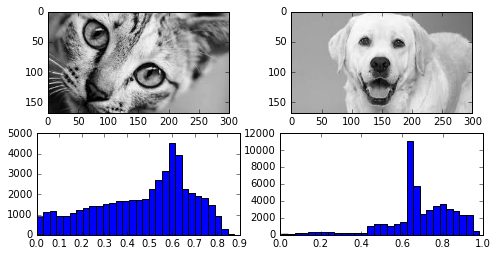

In [10]:
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(2,2, 1)
ax1.imshow(cgs, cmap="gray")
ax2 = fig.add_subplot(2,2, 2)
ax2.imshow(dgs, cmap='gray')
ax3 = fig.add_subplot(2,2, 3)
c_freq, c_bins, c_patches = ax3.hist(cgs.flatten(), bins=30)
ax4 = fig.add_subplot(2,2, 4)
d_freq, d_bins, d_patches = ax4.hist(dgs.flatten(), bins=30)

# Image aggregation statistics

# RGB ranges

In [11]:
from scipy.stats import describe

cat_rgb = cat.reshape((168*300), 3).T
dog_rgb = dog.reshape((168*300), 3).T

cs = describe(cat_rgb, axis=1)
ds = describe(dog_rgb, axis=1)

cat_rgb_range = cs.minmax[1] - cs.minmax[0]
dog_rgb_range = ds.minmax[1] - ds.minmax[0]
rgb_range_df = pd.DataFrame([cat_rgb_range, dog_rgb_range], 
                            columns=['R_range', 'G_range', 'B_range'])
pd.concat([df, rgb_range_df], axis=1)

,Image,R_range,G_range,B_range
0,Cat,240,223,235
1,Dog,246,250,246


# Descriptive aggregations

In [12]:
cat_stats= np.array([np.round(cs.mean, 2),np.round(cs.variance, 2),
                     np.round(cs.kurtosis, 2),np.round(cs.skewness, 2),
                     np.round(np.median(cat_rgb, axis=1), 2)]).flatten()
dog_stats= np.array([np.round(ds.mean, 2),np.round(ds.variance, 2),
                        np.round(ds.kurtosis, 2),np.round(ds.skewness, 2),
                        np.round(np.median(dog_rgb, axis=1), 2)]).flatten()

stats_df = pd.DataFrame([cat_stats, dog_stats],
                        columns=['R_mean', 'G_mean', 'B_mean', 
                                 'R_var', 'G_var', 'B_var',
                                 'R_kurt', 'G_kurt', 'B_kurt',
                                 'R_skew', 'G_skew', 'B_skew',
                                 'R_med', 'G_med', 'B_med'])
pd.concat([df, stats_df], axis=1)

,Image,R_mean,G_mean,B_mean,R_var,G_var,B_var,R_kurt,G_kurt,B_kurt,R_skew,G_skew,B_skew,R_med,G_med,B_med
0,Cat,127.48,118.80,111.94,3054.04,2863.78,3003.05,-0.63,-0.77,-0.94,-0.48,-0.50,-0.25,140.0,132.0,120.0
1,Dog,184.46,173.46,160.77,1887.71,1776.00,1574.73,1.30,2.24,2.32,-0.96,-1.12,-1.09,185.0,169.0,165.0


# Edge detection

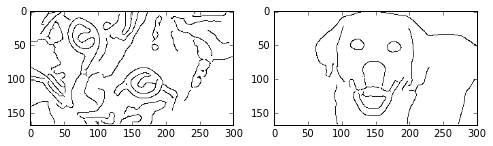

In [13]:
from skimage.feature import canny

cat_edges = canny(cgs, sigma=3)
dog_edges = canny(dgs, sigma=3)

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_edges, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_edges, cmap='binary')

# Object detection

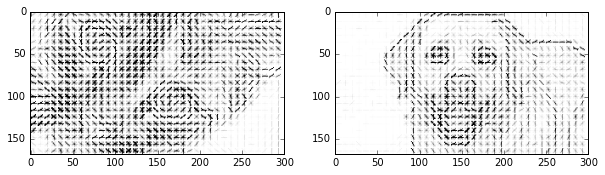

In [14]:
from skimage.feature import hog
from skimage import exposure

fd_cat, cat_hog = hog(cgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)
fd_dog, dog_hog = hog(dgs, orientations=8, pixels_per_cell=(8, 8),
                    cells_per_block=(3, 3), visualise=True)

# rescaling intensity to get better plots
cat_hogs = exposure.rescale_intensity(cat_hog, in_range=(0, 0.04))
dog_hogs = exposure.rescale_intensity(dog_hog, in_range=(0, 0.04))

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(cat_hogs, cmap='binary')
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(dog_hogs, cmap='binary')

In [15]:
print(fd_cat, fd_cat.shape)

(array([ 0.00535206,  0.00130402,  0.02271769, ...,  0.        ,
        0.        ,  0.        ]), (47880,))


# Localized feature extraction

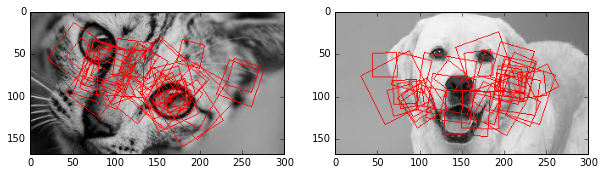

In [16]:
from mahotas.features import surf
import mahotas as mh

cat_mh = mh.colors.rgb2gray(cat)
dog_mh = mh.colors.rgb2gray(dog)

cat_surf = surf.surf(cat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)
dog_surf = surf.surf(dog_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=54)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(cat_mh, cat_surf))
ax2 = fig.add_subplot(1,2, 2)
ax2.imshow(surf.show_surf(dog_mh, dog_surf))

In [17]:
cat_surf_fds = surf.dense(cat_mh, spacing=10)
dog_surf_fds = surf.dense(dog_mh, spacing=10)
cat_surf_fds.shape

(140, 64)

# Visual Bag of Words model

# Engineering features from SURF feature descriptions with clustering

In [18]:
from sklearn.cluster import KMeans

k = 20
km = KMeans(k, n_init=100, max_iter=100)

surf_fd_features = np.array([cat_surf_fds, dog_surf_fds])
km.fit(np.concatenate(surf_fd_features))

vbow_features = []
for feature_desc in surf_fd_features:
    labels = km.predict(feature_desc)
    vbow = np.bincount(labels, minlength=k)
    vbow_features.append(vbow)

vbow_df = pd.DataFrame(vbow_features)
pd.concat([df, vbow_df], axis=1)

,Image,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,Cat,1,8,2,9,5,2,10,26,13,...,2,0,13,12,3,0,12,14,0,7
1,Dog,16,7,6,10,5,7,7,8,6,...,5,13,5,9,10,2,13,3,2,3


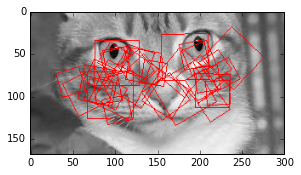

In [19]:
# Trying out the VBOW pipeline on a new image
new_cat = io.imread('new_cat.png')
newcat_mh = mh.colors.rgb2gray(new_cat)
newcat_surf = surf.surf(newcat_mh, nr_octaves=8, nr_scales=16, initial_step_size=1, threshold=0.1, max_points=50)

fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(1,2, 1)
ax1.imshow(surf.show_surf(newcat_mh, newcat_surf))

In [20]:
new_surf_fds = surf.dense(newcat_mh, spacing=10)

labels = km.predict(new_surf_fds)
new_vbow = np.bincount(labels, minlength=k)
pd.DataFrame([new_vbow])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,12,3,12,8,4,6,4,13,0,2,4,10,9,10,0,22,14,0,5


In [21]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

eucdis = euclidean_distances(new_vbow.reshape(1,-1) , vbow_features)
cossim = cosine_similarity(new_vbow.reshape(1,-1) , vbow_features)

result_df = pd.DataFrame({'EuclideanDistance': eucdis[0],
              'CosineSimilarity': cossim[0]})
pd.concat([df, result_df], axis=1)

,Image,CosineSimilarity,EuclideanDistance
0,Cat,0.790655,26.981475
1,Dog,0.777357,25.612497


# Automated Feature Engineering with Deep Learning

In [22]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K

# Build a basic 2-layer CNN

In [23]:
model = Sequential()
model.add(Conv2D(4, (4, 4), input_shape=(168, 300, 3), activation='relu', 
                 kernel_initializer='glorot_uniform'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(4, (4, 4), activation='relu', 
                kernel_initializer='glorot_uniform'))

# Visualize the CNN architecture

In [24]:
# from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# SVG(model_to_dot(model, show_shapes=True, 
#                  show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 165, 297, 4)       196       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 82, 148, 4)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 79, 145, 4)        260       
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________
None


# Build functions to extract features from intermediate layers

In [25]:
first_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                              [model.layers[0].output])
second_conv_layer = K.function([model.layers[0].input, K.learning_phase()], 
                               [model.layers[2].output])

In [26]:
getFeatureModel = Model( [model.layers[0],model.layers[0],model.layers[0]] , [model.layers[1] ] )
getFeatureModel.predict( [X_train_gray,X_train_flow_x,X_train_flow_y] )

NameError: name 'Model' is not defined

# Extract and visualize image representation features

In [27]:
catr = cat.reshape(1, 168, 300,3)

# extract feaures 
first_conv_features = first_conv_layer([catr])[0][0]
second_conv_features = second_conv_layer([catr])[0][0]

TypeError: Missing required input: keras_learning_phase

NameError: name 'first_conv_features' is not defined

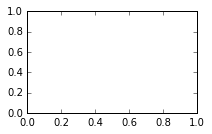

In [28]:
# view feature representations
fig = plt.figure(figsize = (14,4))
ax1 = fig.add_subplot(2,4, 1)
ax1.imshow(first_conv_features[:,:,0])
ax2 = fig.add_subplot(2,4, 2)
ax2.imshow(first_conv_features[:,:,1])
ax3 = fig.add_subplot(2,4, 3)
ax3.imshow(first_conv_features[:,:,2])
ax4 = fig.add_subplot(2,4, 4)
ax4.imshow(first_conv_features[:,:,3])

ax5 = fig.add_subplot(2,4, 5)
ax5.imshow(second_conv_features[:,:,0])
ax6 = fig.add_subplot(2,4, 6)
ax6.imshow(second_conv_features[:,:,1])
ax7 = fig.add_subplot(2,4, 7)
ax7.imshow(second_conv_features[:,:,2])
ax8 = fig.add_subplot(2,4, 8)
ax8.imshow(second_conv_features[:,:,3])

In [29]:
sample_features = np.round(np.array(first_conv_features[:,:,1], dtype='float'), 2)
print(sample_features)
print(sample_features.shape)

NameError: name 'first_conv_features' is not defined

# Feature Engineering For the Numerical Data

# Import necessary dependencies and settings

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

# Raw Measures

In [31]:
poke_df = pd.read_csv('Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [32]:
poke_df[['HP', 'Attack', 'Defense']].head()

,HP,Attack,Defense
0,45,49,49
1,60,62,63
2,80,82,83
3,80,100,123
4,39,52,43


In [33]:
poke_df[['HP', 'Attack', 'Defense']].describe()

,HP,Attack,Defense
count,800.000000,800.000000,800.000000
mean,69.258750,79.001250,73.842500
std,25.534669,32.457366,31.183501
min,1.000000,5.000000,5.000000
25%,50.000000,55.000000,50.000000
50%,65.000000,75.000000,70.000000
75%,80.000000,100.000000,90.000000
max,255.000000,190.000000,230.000000


# Counts

In [34]:
popsong_df = pd.read_csv('song_views.csv', encoding='utf-8')
popsong_df.head(10)

,user_id,song_id,title,listen_count
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0


# Binarization

In [35]:
watched = np.array(popsong_df['listen_count']) 
watched[watched >= 1] = 1
popsong_df['watched'] = watched
popsong_df.head(10)

,user_id,song_id,title,listen_count,watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0


In [36]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=0.9)
pd_watched = bn.transform([popsong_df['listen_count']])[0]
popsong_df['pd_watched'] = pd_watched
popsong_df.head(11)

,user_id,song_id,title,listen_count,watched,pd_watched
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,1,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,0,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,0,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,0,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,0,0
5,68f0359a2f1cedb0d15c98d88017281db79f9bc6,SOBONKR12A58A7A7E0,You're The One,0,0,0
6,116a4c95d63623a967edf2f3456c90ebbf964e6f,SOBONKR12A58A7A7E0,You're The One,17,1,1
7,45544491ccfcdc0b0803c34f201a6287ed4e30f8,SOBONKR12A58A7A7E0,You're The One,0,0,0
8,e701a24d9b6c59f5ac37ab28462ca82470e27cfb,SOBONKR12A58A7A7E0,You're The One,68,1,1
9,edc8b7b1fd592a3b69c3d823a742e1a064abec95,SOBONKR12A58A7A7E0,You're The One,0,0,0


# Rounding

In [37]:
items_popularity = pd.read_csv('item_popularity.csv', encoding='utf-8')
items_popularity

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101
5,it_90120,0.81212
6,it_10123,0.56502


In [38]:
items_popularity['popularity_scale_10'] = np.array(np.round((items_popularity['pop_percent'] * 10)), dtype='int')
items_popularity['popularity_scale_100'] = np.array(np.round((items_popularity['pop_percent'] * 100)), dtype='int')
items_popularity

,item_id,pop_percent,popularity_scale_10,popularity_scale_100
0,it_01345,0.98324,10,98
1,it_03431,0.56123,6,56
2,it_04572,0.12098,1,12
3,it_98021,0.35476,4,35
4,it_01298,0.92101,9,92
5,it_90120,0.81212,8,81
6,it_10123,0.56502,6,57


# Interactions

In [39]:
atk_def = poke_df[['Attack', 'Defense']]
atk_def.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,100,123
4,52,43


In [40]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
res = pf.fit_transform(atk_def)
res

array([[    49.,     49.,   2401.,   2401.,   2401.],
       [    62.,     63.,   3844.,   3906.,   3969.],
       [    82.,     83.,   6724.,   6806.,   6889.],
       ..., 
       [   110.,     60.,  12100.,   6600.,   3600.],
       [   160.,     60.,  25600.,   9600.,   3600.],
       [   110.,    120.,  12100.,  13200.,  14400.]])

In [41]:
pd.DataFrame(pf.powers_, columns=['Attack_degree', 'Defense_degree'])

,Attack_degree,Defense_degree
0,1,0
1,0,1
2,2,0
3,1,1
4,0,2


In [42]:
intr_features = pd.DataFrame(res, columns=['Attack', 'Defense', 'Attack^2', 'Attack x Defense', 'Defense^2'])
intr_features.head(5)

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,49.0,49.0,2401.0,2401.0,2401.0
1,62.0,63.0,3844.0,3906.0,3969.0
2,82.0,83.0,6724.0,6806.0,6889.0
3,100.0,123.0,10000.0,12300.0,15129.0
4,52.0,43.0,2704.0,2236.0,1849.0


# Transforming new data in the future (during predictions)

In [43]:
new_df = pd.DataFrame([[95, 75],[121, 120], [77, 60]], 
                      columns=['Attack', 'Defense'])
new_df

,Attack,Defense
0,95,75
1,121,120
2,77,60


In [44]:
new_res = pf.transform(new_df)
new_intr_features = pd.DataFrame(new_res, 
                                 columns=['Attack', 'Defense', 
                                          'Attack^2', 'Attack x Defense', 'Defense^2'])
new_intr_features

,Attack,Defense,Attack^2,Attack x Defense,Defense^2
0,95.0,75.0,9025.0,7125.0,5625.0
1,121.0,120.0,14641.0,14520.0,14400.0
2,77.0,60.0,5929.0,4620.0,3600.0


# Binning

In [45]:
fcc_survey_df = pd.read_csv('fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


# Fixed-width binning

# Developer age distribution

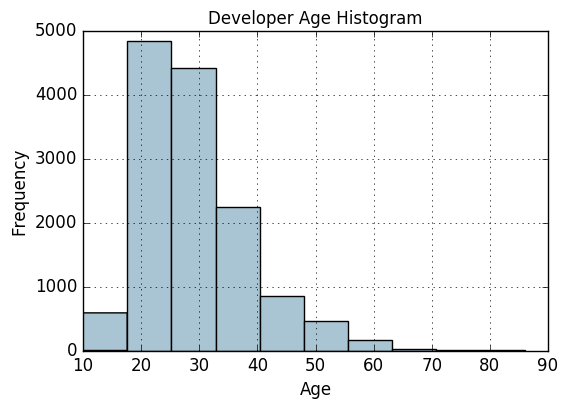

In [46]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)


# Binning based on rounding 
# Age Range: Bin
# ---------------
#  0 -  9  : 0
# 10 - 19  : 1
# 20 - 29  : 2
# 30 - 39  : 3
# 40 - 49  : 4
# 50 - 59  : 5
# 60 - 69  : 6
#   ... and so on


In [47]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]


# Binning based on custom ranges 
# Age Range : Bin
# ---------------
#  0 -  15  : 1
# 16 -  30  : 2
# 31 -  45  : 3
# 46 -  60  : 4
# 61 -  75  : 5
# 75 - 100  : 6


,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [48]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


# Quantile based binning

In [49]:
fcc_survey_df[['ID.x', 'Age', 'Income']].iloc[4:9]

,ID.x,Age,Income
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0
7,6dff182db452487f07a47596f314bddc,35.0,40000.0
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0


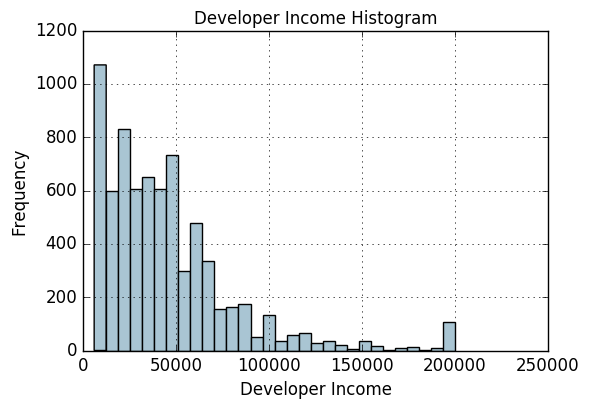

In [50]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [51]:
quantile_list = [0, .25, .50, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

/export/home/aaescore/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


0.00   NaN
0.25   NaN
0.50   NaN
0.75   NaN
1.00   NaN
Name: Income, dtype: float64

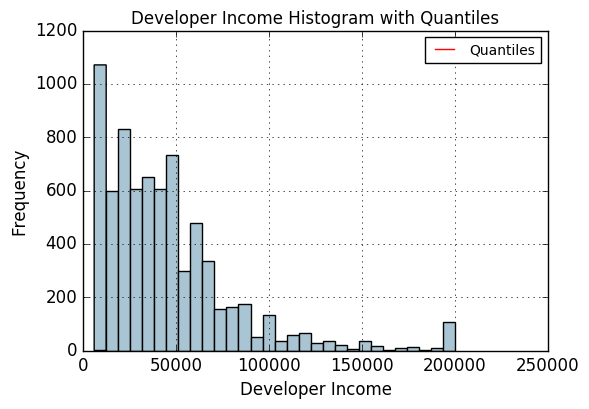

In [52]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Developer Income Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [53]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"[6000, 20000]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000, 60000]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000, 37000]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000, 60000]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000, 200000]",75-100Q


# Mathematical Transformations

Log transform

In [54]:
fcc_survey_df['Income_log'] = np.log((1+ fcc_survey_df['Income']))
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log']].iloc[4:9]

,ID.x,Age,Income,Income_log
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794


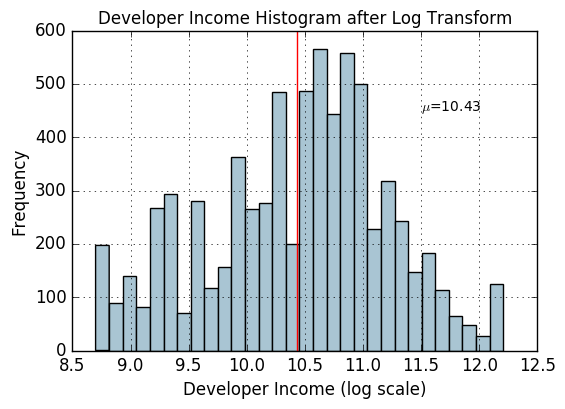

In [55]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10)

# Box–Cox transform

In [56]:
# get optimal lambda value from non null income values
income = np.array(fcc_survey_df['Income'])
income_clean = income[~np.isnan(income)]
l, opt_lambda = spstats.boxcox(income_clean)
print('Optimal lambda value:', opt_lambda)

('Optimal lambda value:', 0.11799123945557663)


In [57]:
fcc_survey_df['Income_boxcox_lambda_0'] = spstats.boxcox((1+fcc_survey_df['Income']), 
                                                         lmbda=0)
fcc_survey_df['Income_boxcox_lambda_opt'] = spstats.boxcox(fcc_survey_df['Income'], 
                                                           lmbda=opt_lambda)
fcc_survey_df[['ID.x', 'Age', 'Income', 'Income_log', 
               'Income_boxcox_lambda_0', 'Income_boxcox_lambda_opt']].iloc[4:9]

,ID.x,Age,Income,Income_log,Income_boxcox_lambda_0,Income_boxcox_lambda_opt
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,8.699681,8.699681,15.180668
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,10.596660,10.596660,21.115342
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,10.373522,10.373522,20.346420
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,10.596660,10.596660,21.115342
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,11.289794,11.289794,23.637131


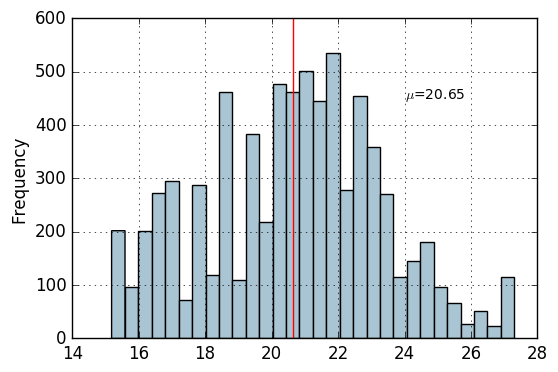

In [62]:
income_boxcox_mean = np.round(np.mean(fcc_survey_df['Income_boxcox_lambda_opt']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_boxcox_lambda_opt'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_boxcox_mean, color='r')
# ax.set_title('Developer Income Histogram after Box–Cox Transform', fontsize=12)
# ax.set_xlabel('Developer Income (Box–Cox transform)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(24, 450, r'$\mu$='+str(income_boxcox_mean), fontsize=10)

# Feature Engineering for the Temporal Data

# Import necessary dependencies and settings

In [63]:
import datetime
import numpy as np
import pandas as pd
from dateutil.parser import parse
import pytz

In [64]:
# Load and process sample temporal data
time_stamps = ['2015-03-08 10:30:00.360000+00:00', '2017-07-13 15:45:05.755000-07:00',
               '2012-01-20 22:30:00.254000+05:30', '2016-12-25 00:30:00.000000+10:00']
df = pd.DataFrame(time_stamps, columns=['Time'])
df

,Time
0,2015-03-08 10:30:00.360000+00:00
1,2017-07-13 15:45:05.755000-07:00
2,2012-01-20 22:30:00.254000+05:30
3,2016-12-25 00:30:00.000000+10:00


In [65]:
ts_objs = np.array([pd.Timestamp(item) for item in np.array(df.Time)])
df['TS_obj'] = ts_objs
ts_objs

array([Timestamp('2015-03-08 10:30:00.360000+0000', tz='UTC'),
       Timestamp('2017-07-13 15:45:05.755000-0700', tz='pytz.FixedOffset(-420)'),
       Timestamp('2012-01-20 22:30:00.254000+0530', tz='pytz.FixedOffset(330)'),
       Timestamp('2016-12-25 00:30:00+1000', tz='pytz.FixedOffset(600)')], dtype=object)

# Date based features

In [66]:
df['Year'] = df['TS_obj'].apply(lambda d: d.year)
df['Month'] = df['TS_obj'].apply(lambda d: d.month)
df['Day'] = df['TS_obj'].apply(lambda d: d.day)
df['DayOfWeek'] = df['TS_obj'].apply(lambda d: d.dayofweek)
df['DayName'] = df['TS_obj'].apply(lambda d: d.weekday_name)
df['DayOfYear'] = df['TS_obj'].apply(lambda d: d.dayofyear)
df['WeekOfYear'] = df['TS_obj'].apply(lambda d: d.weekofyear)
df['Quarter'] = df['TS_obj'].apply(lambda d: d.quarter)

df[['Time', 'Year', 'Month', 'Day', 'Quarter', 
    'DayOfWeek', 'DayName', 'DayOfYear', 'WeekOfYear']]

,Time,Year,Month,Day,Quarter,DayOfWeek,DayName,DayOfYear,WeekOfYear
0,2015-03-08 10:30:00.360000+00:00,2015,3,8,1,6,Sunday,67,10
1,2017-07-13 15:45:05.755000-07:00,2017,7,13,3,3,Thursday,194,28
2,2012-01-20 22:30:00.254000+05:30,2012,1,20,1,4,Friday,20,3
3,2016-12-25 00:30:00.000000+10:00,2016,12,25,4,6,Saturday,359,51


# Time based features

In [67]:
df['Hour'] = df['TS_obj'].apply(lambda d: d.hour)
df['Minute'] = df['TS_obj'].apply(lambda d: d.minute)
df['Second'] = df['TS_obj'].apply(lambda d: d.second)
df['MUsecond'] = df['TS_obj'].apply(lambda d: d.microsecond)
df['UTC_offset'] = df['TS_obj'].apply(lambda d: d.utcoffset())

df[['Time', 'Hour', 'Minute', 'Second', 'MUsecond', 'UTC_offset']]

,Time,Hour,Minute,Second,MUsecond,UTC_offset
0,2015-03-08 10:30:00.360000+00:00,10,30,0,360000,00:00:00
1,2017-07-13 15:45:05.755000-07:00,15,45,5,755000,-1 days +17:00:00
2,2012-01-20 22:30:00.254000+05:30,22,30,0,254000,05:30:00
3,2016-12-25 00:30:00.000000+10:00,0,30,0,0,10:00:00


In [68]:
hour_bins = [-1, 5, 11, 16, 21, 23]
bin_names = ['Late Night', 'Morning', 'Afternoon', 'Evening', 'Night']
df['TimeOfDayBin'] = pd.cut(df['Hour'], 
                            bins=hour_bins, labels=bin_names)
df[['Time', 'Hour', 'TimeOfDayBin']]

,Time,Hour,TimeOfDayBin
0,2015-03-08 10:30:00.360000+00:00,10,Morning
1,2017-07-13 15:45:05.755000-07:00,15,Afternoon
2,2012-01-20 22:30:00.254000+05:30,22,Night
3,2016-12-25 00:30:00.000000+10:00,0,Late Night


In [69]:
df['TZ_info'] = df['TS_obj'].apply(lambda d: d.tzinfo)
df['TimeZones'] = df['TS_obj'].apply(lambda d: list({d.astimezone(tz).tzname() 
                                   for tz in map(pytz.timezone, 
                                                 pytz.all_timezones_set)
                                       if d.astimezone(tz).utcoffset() == d.utcoffset()}))

df[['Time', 'UTC_offset', 'TZ_info', 'TimeZones']]

,Time,UTC_offset,TZ_info,TimeZones
0,2015-03-08 10:30:00.360000+00:00,00:00:00,UTC,"[UTC, GMT, UCT, WET]"
1,2017-07-13 15:45:05.755000-07:00,-1 days +17:00:00,pytz.FixedOffset(-420),"[PDT, MST, GMT+7]"
2,2012-01-20 22:30:00.254000+05:30,05:30:00,pytz.FixedOffset(330),[IST]
3,2016-12-25 00:30:00.000000+10:00,10:00:00,pytz.FixedOffset(600),"[ChST, PGT, VLAT, CHUT, AEST, DDUT, GMT-10]"


In [70]:
df['TimeUTC'] = df['TS_obj'].apply(lambda d: d.tz_convert(pytz.utc))
# df['Epoch'] = df['TimeUTC'].apply(lambda d: d.timestamp())
df['GregOrdinal'] = df['TimeUTC'].apply(lambda d: d.toordinal())

# df[['Time', 'TimeUTC', 'Epoch', 'GregOrdinal']]

df[['Time', 'TimeUTC', 'GregOrdinal']]

,Time,TimeUTC,GregOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,735665
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,736523
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,734522
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,736322


In [71]:
curr_ts = datetime.datetime.now(pytz.utc)
# compute days elapsed since today
# df['DaysElapsedEpoch'] = (curr_ts.timestamp() - df['Epoch']) / (3600*24)
df['DaysElapsedOrdinal'] = (curr_ts.toordinal() - df['GregOrdinal']) 

# df[['Time', 'TimeUTC', 'DaysElapsedEpoch', 'DaysElapsedOrdinal']]
df[['Time', 'TimeUTC', 'DaysElapsedOrdinal']]

,Time,TimeUTC,DaysElapsedOrdinal
0,2015-03-08 10:30:00.360000+00:00,2015-03-08 10:30:00.360000+00:00,1073
1,2017-07-13 15:45:05.755000-07:00,2017-07-13 22:45:05.755000+00:00,215
2,2012-01-20 22:30:00.254000+05:30,2012-01-20 17:00:00.254000+00:00,2216
3,2016-12-25 00:30:00.000000+10:00,2016-12-24 14:30:00+00:00,416


# Feature Engineering on Categorical Data

# Import necessary dependencies and settings

In [72]:
import pandas as pd
import numpy as np

# Transforming Nominal Features

In [73]:
vg_df = pd.read_csv('vgsales.csv', encoding='utf-8')
vg_df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']].iloc[1:7]

,Name,Platform,Year,Genre,Publisher
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo
5,Tetris,GB,1989.0,Puzzle,Nintendo
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo


In [74]:
genres = np.unique(vg_df['Genre'])
genres

array([u'Action', u'Adventure', u'Fighting', u'Misc', u'Platform',
       u'Puzzle', u'Racing', u'Role-Playing', u'Shooter', u'Simulation',
       u'Sports', u'Strategy'], dtype=object)

In [75]:
from sklearn.preprocessing import LabelEncoder

gle = LabelEncoder()
genre_labels = gle.fit_transform(vg_df['Genre'])
genre_mappings = {index: label for index, label in enumerate(gle.classes_)}
genre_mappings

{0: u'Action',
 1: u'Adventure',
 2: u'Fighting',
 3: u'Misc',
 4: u'Platform',
 5: u'Puzzle',
 6: u'Racing',
 7: u'Role-Playing',
 8: u'Shooter',
 9: u'Simulation',
 10: u'Sports',
 11: u'Strategy'}

In [76]:
vg_df['GenreLabel'] = genre_labels
vg_df[['Name', 'Platform', 'Year', 'Genre', 'GenreLabel']].iloc[1:7]

,Name,Platform,Year,Genre,GenreLabel
1,Super Mario Bros.,NES,1985.0,Platform,4
2,Mario Kart Wii,Wii,2008.0,Racing,6
3,Wii Sports Resort,Wii,2009.0,Sports,10
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,7
5,Tetris,GB,1989.0,Puzzle,5
6,New Super Mario Bros.,DS,2006.0,Platform,4


# Transforming Ordinal Features

In [77]:
poke_df = pd.read_csv('Pokemon.csv', encoding='utf-8')
poke_df = poke_df.sample(random_state=1, frac=1).reset_index(drop=True)

np.unique(poke_df['Generation'])

array([u'Gen 1', u'Gen 2', u'Gen 3', u'Gen 4', u'Gen 5', u'Gen 6'], dtype=object)

In [78]:
gen_ord_map = {'Gen 1': 1, 'Gen 2': 2, 'Gen 3': 3, 
               'Gen 4': 4, 'Gen 5': 5, 'Gen 6': 6}

poke_df['GenerationLabel'] = poke_df['Generation'].map(gen_ord_map)
poke_df[['Name', 'Generation', 'GenerationLabel']].iloc[4:10]

,Name,Generation,GenerationLabel
4,Octillery,Gen 2,2
5,Helioptile,Gen 6,6
6,Dialga,Gen 4,4
7,DeoxysDefense Forme,Gen 3,3
8,Rapidash,Gen 1,1
9,Swanna,Gen 5,5


# Encoding Categorical Features

# One-hot Encoding Scheme

In [79]:
poke_df[['Name', 'Generation', 'Legendary']].iloc[4:10]

,Name,Generation,Legendary
4,Octillery,Gen 2,False
5,Helioptile,Gen 6,False
6,Dialga,Gen 4,True
7,DeoxysDefense Forme,Gen 3,True
8,Rapidash,Gen 1,False
9,Swanna,Gen 5,False


In [80]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# transform and map pokemon generations
gen_le = LabelEncoder()
gen_labels = gen_le.fit_transform(poke_df['Generation'])
poke_df['Gen_Label'] = gen_labels

# transform and map pokemon legendary status
leg_le = LabelEncoder()
leg_labels = leg_le.fit_transform(poke_df['Legendary'])
poke_df['Lgnd_Label'] = leg_labels

poke_df_sub = poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]
poke_df_sub.iloc[4:10]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
4,Octillery,Gen 2,1,False,0
5,Helioptile,Gen 6,5,False,0
6,Dialga,Gen 4,3,True,1
7,DeoxysDefense Forme,Gen 3,2,True,1
8,Rapidash,Gen 1,0,False,0
9,Swanna,Gen 5,4,False,0


In [81]:
# encode generation labels using one-hot encoding scheme
gen_ohe = OneHotEncoder()
gen_feature_arr = gen_ohe.fit_transform(poke_df[['Gen_Label']]).toarray()
gen_feature_labels = list(gen_le.classes_)
gen_features = pd.DataFrame(gen_feature_arr, columns=gen_feature_labels)

# encode legendary status labels using one-hot encoding scheme
leg_ohe = OneHotEncoder()
leg_feature_arr = leg_ohe.fit_transform(poke_df[['Lgnd_Label']]).toarray()
leg_feature_labels = ['Legendary_'+str(cls_label) for cls_label in leg_le.classes_]
leg_features = pd.DataFrame(leg_feature_arr, columns=leg_feature_labels)

In [82]:
poke_df_ohe = pd.concat([poke_df_sub, gen_features, leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'],gen_feature_labels,
              ['Legendary', 'Lgnd_Label'],leg_feature_labels], [])
poke_df_ohe[columns].iloc[4:10]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
4,Octillery,Gen 2,1,0.0,1.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
5,Helioptile,Gen 6,5,0.0,0.0,0.0,0.0,0.0,1.0,False,0,1.0,0.0
6,Dialga,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,True,1,0.0,1.0
7,DeoxysDefense Forme,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
8,Rapidash,Gen 1,0,1.0,0.0,0.0,0.0,0.0,0.0,False,0,1.0,0.0
9,Swanna,Gen 5,4,0.0,0.0,0.0,0.0,1.0,0.0,False,0,1.0,0.0


In [83]:
new_poke_df = pd.DataFrame([['PikaZoom', 'Gen 3', True], 
                           ['CharMyToast', 'Gen 4', False]],
                           columns=['Name', 'Generation', 'Legendary'])
new_poke_df

,Name,Generation,Legendary
0,PikaZoom,Gen 3,True
1,CharMyToast,Gen 4,False


In [84]:
new_gen_labels = gen_le.transform(new_poke_df['Generation'])
new_poke_df['Gen_Label'] = new_gen_labels

new_leg_labels = leg_le.transform(new_poke_df['Legendary'])
new_poke_df['Lgnd_Label'] = new_leg_labels

new_poke_df[['Name', 'Generation', 'Gen_Label', 'Legendary', 'Lgnd_Label']]

,Name,Generation,Gen_Label,Legendary,Lgnd_Label
0,PikaZoom,Gen 3,2,True,1
1,CharMyToast,Gen 4,3,False,0


In [85]:
new_gen_feature_arr = gen_ohe.transform(new_poke_df[['Gen_Label']]).toarray()
new_gen_features = pd.DataFrame(new_gen_feature_arr, columns=gen_feature_labels)

new_leg_feature_arr = leg_ohe.transform(new_poke_df[['Lgnd_Label']]).toarray()
new_leg_features = pd.DataFrame(new_leg_feature_arr, columns=leg_feature_labels)

new_poke_ohe = pd.concat([new_poke_df, new_gen_features, new_leg_features], axis=1)
columns = sum([['Name', 'Generation', 'Gen_Label'], gen_feature_labels,
               ['Legendary', 'Lgnd_Label'], leg_feature_labels], [])
new_poke_ohe[columns]

,Name,Generation,Gen_Label,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6,Legendary,Lgnd_Label,Legendary_False,Legendary_True
0,PikaZoom,Gen 3,2,0.0,0.0,1.0,0.0,0.0,0.0,True,1,0.0,1.0
1,CharMyToast,Gen 4,3,0.0,0.0,0.0,1.0,0.0,0.0,False,0,1.0,0.0


In [86]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
pd.concat([poke_df[['Name', 'Generation']], gen_onehot_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,0.0,1.0,0.0,0.0,0.0,0.0
5,Helioptile,Gen 6,0.0,0.0,0.0,0.0,0.0,1.0
6,Dialga,Gen 4,0.0,0.0,0.0,1.0,0.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,0.0,1.0,0.0,0.0,0.0
8,Rapidash,Gen 1,1.0,0.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,0.0,1.0,0.0


# Dummy Coding Scheme

In [87]:
gen_dummy_features = pd.get_dummies(poke_df['Generation'], drop_first=True)
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
4,Octillery,Gen 2,1.0,0.0,0.0,0.0,0.0
5,Helioptile,Gen 6,0.0,0.0,0.0,0.0,1.0
6,Dialga,Gen 4,0.0,0.0,1.0,0.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,1.0,0.0,0.0,0.0
8,Rapidash,Gen 1,0.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,1.0,0.0


In [88]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_dummy_features = gen_onehot_features.iloc[:,:-1]
pd.concat([poke_df[['Name', 'Generation']], gen_dummy_features], axis=1).iloc[4:10]

,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0.0,1.0,0.0,0.0,0.0
5,Helioptile,Gen 6,0.0,0.0,0.0,0.0,0.0
6,Dialga,Gen 4,0.0,0.0,0.0,1.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,0.0,1.0,0.0,0.0
8,Rapidash,Gen 1,1.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,0.0,1.0


# Effect Coding Scheme

In [89]:
gen_onehot_features = pd.get_dummies(poke_df['Generation'])
gen_effect_features = gen_onehot_features.iloc[:,:-1]
gen_effect_features.loc[np.all(gen_effect_features == 0, axis=1)] = -1.
pd.concat([poke_df[['Name', 'Generation']], gen_effect_features], axis=1).iloc[4:10]

/export/home/aaescore/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/aaescore_home/client_software/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Name,Generation,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5
4,Octillery,Gen 2,0.0,1.0,0.0,0.0,0.0
5,Helioptile,Gen 6,-1.0,-1.0,-1.0,-1.0,-1.0
6,Dialga,Gen 4,0.0,0.0,0.0,1.0,0.0
7,DeoxysDefense Forme,Gen 3,0.0,0.0,1.0,0.0,0.0
8,Rapidash,Gen 1,1.0,0.0,0.0,0.0,0.0
9,Swanna,Gen 5,0.0,0.0,0.0,0.0,1.0


# Feature Hashing scheme

In [90]:
unique_genres = np.unique(vg_df[['Genre']])
print("Total game genres:", len(unique_genres))
print(unique_genres)

('Total game genres:', 12)
[u'Action' u'Adventure' u'Fighting' u'Misc' u'Platform' u'Puzzle' u'Racing'
 u'Role-Playing' u'Shooter' u'Simulation' u'Sports' u'Strategy']


In [91]:
from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(vg_df['Genre'])
hashed_features = hashed_features.toarray()
pd.concat([vg_df[['Name', 'Genre']], pd.DataFrame(hashed_features)], axis=1).iloc[1:7]

,Name,Genre,0,1,2,3,4,5
1,Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0
2,Mario Kart Wii,Racing,-1.0,0.0,0.0,0.0,0.0,-1.0
3,Wii Sports Resort,Sports,-2.0,2.0,0.0,-2.0,0.0,0.0
4,Pokemon Red/Pokemon Blue,Role-Playing,-1.0,1.0,2.0,0.0,1.0,-1.0
5,Tetris,Puzzle,0.0,1.0,1.0,-2.0,1.0,-1.0
6,New Super Mario Bros.,Platform,0.0,2.0,2.0,-1.0,1.0,0.0


In [92]:
fh.get_params()

{'alternate_sign': True,
 'dtype': numpy.float64,
 'input_type': 'string',
 'n_features': 6,
 'non_negative': False}

# Feature Engineering on the Text Data

# Import necessary dependencies and settings

In [93]:
import pandas as pd
import numpy as np
import re
import nltk

# Sample corpus of text documents

In [94]:
corpus = ['The sky is blue and beautiful.',
          'Love this blue and beautiful sky!',
          'The quick brown fox jumps over the lazy dog.',
          'The brown fox is quick and the blue dog is lazy!',
          'The sky is very blue and the sky is very beautiful today',
          'The dog is lazy but the brown fox is quick!'    
]
labels = ['weather', 'weather', 'animals', 'animals', 'weather', 'animals']
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,The sky is blue and beautiful.,weather
1,Love this blue and beautiful sky!,weather
2,The quick brown fox jumps over the lazy dog.,animals
3,The brown fox is quick and the blue dog is lazy!,animals
4,The sky is very blue and the sky is very beaut...,weather
5,The dog is lazy but the brown fox is quick!,animals


# Simple text pre-processing

In [95]:
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - '/export/home/a589565/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/export/home/aaescore/anaconda2/nltk_data'
    - '/export/home/aaescore/anaconda2/lib/nltk_data'
**********************************************************************


In [96]:
norm_corpus = normalize_corpus(corpus)
norm_corpus

NameError: name 'normalize_corpus' is not defined

# Bag of Words Model

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
# cv_matrix = cv.fit_transform(norm_corpus)
cv_matrix = cv.fit_transform(corpus)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2],
       [0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0]])

In [98]:
vocab = cv.get_feature_names()
pd.DataFrame(cv_matrix, columns=vocab)

,and,beautiful,blue,brown,but,dog,fox,is,jumps,lazy,love,over,quick,sky,the,this,today,very
0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0
1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,0,0,0,1,0,1,1,0,1,1,0,1,1,0,2,0,0,0
3,1,0,1,1,0,1,1,2,0,1,0,0,1,0,2,0,0,0
4,1,1,1,0,0,0,0,2,0,0,0,0,0,2,2,0,1,2
5,0,0,0,1,1,1,1,2,0,1,0,0,1,0,2,0,0,0


# Bag of N-Grams Model

In [99]:
bv = CountVectorizer(ngram_range=(2,2))
# bv_matrix = bv.fit_transform(norm_corpus)
bv_matrix = bv.fit_transform(corpus)
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,and beautiful,and the,beautiful sky,beautiful today,blue and,blue dog,brown fox,but the,dog is,fox is,...,sky is,the blue,the brown,the dog,the lazy,the quick,the sky,this blue,very beautiful,very blue
0,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,1,0,0,0,1,1,0,1,1,...,0,1,1,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,...,2,0,0,0,0,0,2,0,1,1
5,0,0,0,0,0,0,1,1,1,1,...,0,0,1,1,0,0,0,0,0,0


# TF-IDF Model

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
# tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv.fit_transform(corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,and,beautiful,blue,brown,but,dog,fox,is,jumps,lazy,love,over,quick,sky,the,this,today,very
0,0.39,0.46,0.39,0.00,0.00,0.00,0.00,0.39,0.00,0.00,0.00,0.00,0.00,0.46,0.34,0.00,0.00,0.00
1,0.31,0.36,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.52,0.00,0.00,0.36,0.00,0.52,0.00,0.00
2,0.00,0.00,0.00,0.30,0.00,0.30,0.30,0.00,0.43,0.30,0.00,0.43,0.30,0.00,0.44,0.00,0.00,0.00
3,0.25,0.00,0.25,0.29,0.00,0.29,0.29,0.50,0.00,0.29,0.00,0.00,0.29,0.00,0.43,0.00,0.00,0.00
4,0.18,0.21,0.18,0.00,0.00,0.00,0.00,0.37,0.00,0.00,0.00,0.00,0.00,0.43,0.32,0.00,0.31,0.62
5,0.00,0.00,0.00,0.29,0.41,0.29,0.29,0.49,0.00,0.29,0.00,0.00,0.29,0.00,0.42,0.00,0.00,0.00


# Document Similarity

In [101]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5
0,1.000000,0.575703,0.149071,0.543304,0.687459,0.336586
1,0.575703,1.000000,0.000000,0.156015,0.344427,0.000000
2,0.149071,0.000000,1.000000,0.626392,0.138454,0.610346
3,0.543304,0.156015,0.626392,1.000000,0.412720,0.850982
4,0.687459,0.344427,0.138454,0.412720,1.000000,0.312614
5,0.336586,0.000000,0.610346,0.850982,0.312614,1.000000


# Clustering documents using similarity features

In [102]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit_transform(similarity_df)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,0
3,The brown fox is quick and the blue dog is lazy!,animals,0
4,The sky is very blue and the sky is very beaut...,weather,1
5,The dog is lazy but the brown fox is quick!,animals,0


# Topic models

In [105]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=2, max_iter=100, random_state=42)
dt_matrix = lda.fit_transform(tv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2'])
features

/sasdata/corpid/a589565/conda/sklearn/decomposition/online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


,T1,T2
0,0.186917,0.813083
1,0.158125,0.841875
2,0.855373,0.144627
3,0.802642,0.197358
4,0.174472,0.825528
5,0.849193,0.150807


# Show topics and their weights

In [106]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[(u'the', 1.8540226422959942), (u'is', 1.5077229088040125), (u'quick', 1.3624610625736389), (u'dog', 1.362385557804062), (u'brown', 1.362379803101968), (u'fox', 1.3621865721721975), (u'lazy', 1.3621004685946483), (u'jumps', 0.91978858076931302), (u'over', 0.9197398303796569), (u'but', 0.90408400078878792), (u'and', 0.69882326332602973), (u'blue', 0.69810604387464004)]
()
[(u'sky', 1.7321043374493448), (u'beautiful', 1.51938063939035), (u'blue', 1.4392086843107956), (u'and', 1.438482808217926), (u'is', 1.2437728499539156), (u'very', 1.1027016968838683), (u'the', 1.0972460729040259), (u'this', 1.0135467420131521), (u'love', 1.0134905585027913), (u'today', 0.79726483165604023)]
()


# Clustering documents using topic model features

In [107]:
km = KMeans(n_clusters=2)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,1
1,Love this blue and beautiful sky!,weather,1
2,The quick brown fox jumps over the lazy dog.,animals,0
3,The brown fox is quick and the blue dog is lazy!,animals,0
4,The sky is very blue and the sky is very beaut...,weather,1
5,The dog is lazy but the brown fox is quick!,animals,0


# Word Embeddings

In [108]:
from gensim.models import word2vec

wpt = nltk.WordPunctTokenizer()
# tokenized_corpus = [wpt.tokenize(document) for document in norm_corpus]
tokenized_corpus = [wpt.tokenize(document) for document in corpus]
# Set values for various parameters
feature_size = 10    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count = min_word_count,
                          sample=sample)

In [109]:
w2v_model.wv['sky']

array([ 0.01609838, -0.04814324,  0.04225507, -0.03017689,  0.02541285,
        0.01730927,  0.01553037,  0.00776424, -0.02756037,  0.0164621 ], dtype=float32)

In [110]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector
    
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [111]:
w2v_feature_array = averaged_word_vectorizer(corpus=tokenized_corpus, model=w2v_model,
                                             num_features=feature_size)
pd.DataFrame(w2v_feature_array)

,0,1,2,3,4,5,6,7,8,9
0,-0.008435,0.008980,0.006550,-0.024455,0.005033,0.002089,0.001951,0.006073,-0.001902,0.004740
1,-0.013496,-0.001318,0.008697,-0.016360,-0.004819,0.013564,0.005959,-0.009177,-0.008066,0.009435
2,0.019263,0.016709,-0.006241,-0.019925,0.017502,0.004475,-0.003897,0.007736,-0.011487,-0.013156
3,0.019304,0.015845,0.001191,-0.014246,0.014770,-0.000157,-0.002180,0.007052,-0.000674,-0.007986
4,-0.005563,-0.010508,0.004828,-0.008973,0.008249,-0.003012,0.008643,0.003053,-0.009320,0.006082
5,0.028447,0.018023,0.004038,-0.008584,0.013293,-0.006304,-0.007822,0.006177,-0.005691,-0.016165


In [112]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([corpus_df, cluster_labels], axis=1)

,Document,Category,ClusterLabel
0,The sky is blue and beautiful.,weather,0
1,Love this blue and beautiful sky!,weather,0
2,The quick brown fox jumps over the lazy dog.,animals,1
3,The brown fox is quick and the blue dog is lazy!,animals,1
4,The sky is very blue and the sky is very beaut...,weather,0
5,The dog is lazy but the brown fox is quick!,animals,1


# Feature Scaling

In [113]:
# Import necessary dependencies and settings
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)

In [114]:
# Load sample data of video views
views = pd.DataFrame([1295., 25., 19000., 5., 1., 300.], columns=['views'])
views

,views
0,1295.0
1,25.0
2,19000.0
3,5.0
4,1.0
5,300.0


# Standard Scaler $\frac{x_i - \mu}{\sigma}$

In [115]:
ss = StandardScaler()
views['zscore'] = ss.fit_transform(views[['views']])
views

,views,zscore
0,1295.0,-0.307214
1,25.0,-0.489306
2,19000.0,2.231317
3,5.0,-0.492173
4,1.0,-0.492747
5,300.0,-0.449877


In [116]:
vw = np.array(views['views'])
(vw[0] - np.mean(vw)) / np.std(vw)

-0.30721413311687235

# Min-Max Scaler $\frac{x_i - min(x)}{max(x) - min(x)}$

In [117]:
mms = MinMaxScaler()
views['minmax'] = mms.fit_transform(views[['views']])
views

,views,zscore,minmax
0,1295.0,-0.307214,0.068109
1,25.0,-0.489306,0.001263
2,19000.0,2.231317,1.000000
3,5.0,-0.492173,0.000211
4,1.0,-0.492747,0.000000
5,300.0,-0.449877,0.015738


In [118]:
(vw[0] - np.min(vw)) / (np.max(vw) - np.min(vw))

0.068108847834096528

# Robust Scaler $\frac{x_i - median(x)}{IQR_{(1,3)}(x)}$

In [119]:
rs = RobustScaler()
views['robust'] = rs.fit_transform(views[['views']])
views

,views,zscore,minmax,robust
0,1295.0,-0.307214,0.068109,1.092883
1,25.0,-0.489306,0.001263,-0.132690
2,19000.0,2.231317,1.000000,18.178528
3,5.0,-0.492173,0.000211,-0.151990
4,1.0,-0.492747,0.000000,-0.155850
5,300.0,-0.449877,0.015738,0.132690


In [120]:
quartiles = np.percentile(vw, (25., 75.))
iqr = quartiles[1] - quartiles[0]
(vw[0] - np.median(vw)) / iqr

1.0928829915560916

# Feature Selection

In [121]:
# Import necessary dependencies and settings
import numpy as np
import pandas as pd
np.set_printoptions(suppress=True)
pt = np.get_printoptions()['threshold']

# Threshold based methods
# Limiting features in bag of word based models

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0.1, max_df=0.85, max_features=2000)
cv

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.85, max_features=2000, min_df=0.1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

# Variance based thresholding

In [123]:
df = pd.read_csv('Pokemon.csv')
poke_gen = pd.get_dummies(df['Generation'])
poke_gen.head()

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [124]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=.15)
vt.fit(poke_gen)

VarianceThreshold(threshold=0.15)

In [125]:
pd.DataFrame({'variance': vt.variances_,
              'select_feature': vt.get_support()},
            index=poke_gen.columns).T

,Gen 1,Gen 2,Gen 3,Gen 4,Gen 5,Gen 6
select_feature,True,False,True,False,True,False
variance,0.164444,0.114944,0.16,0.128373,0.163711,0.0919937


In [126]:
poke_gen_subset = poke_gen.iloc[:,vt.get_support()].head()
poke_gen_subset

,Gen 1,Gen 3,Gen 5
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


# Statistical Methods

In [127]:
from sklearn.datasets import load_breast_cancer

bc_data = load_breast_cancer()
bc_features = pd.DataFrame(bc_data.data, columns=bc_data.feature_names)
bc_classes = pd.DataFrame(bc_data.target, columns=['IsMalignant'])

# build featureset and response class labels 
bc_X = np.array(bc_features)
bc_y = np.array(bc_classes).T[0]
print('Feature set shape:', bc_X.shape)
print('Response class shape:', bc_y.shape)

('Feature set shape:', (569, 30))
('Response class shape:', (569,))


In [128]:
np.set_printoptions(threshold=30)
print('Feature set data [shape: '+str(bc_X.shape)+']')
print(np.round(bc_X, 2), '\n')
print('Feature names:')
print(np.array(bc_features.columns), '\n')
print('Predictor Class label data [shape: '+str(bc_y.shape)+']')
print(bc_y, '\n')
print('Predictor name:', np.array(bc_classes.columns))
np.set_printoptions(threshold=pt)

Feature set data [shape: (569, 30)]
(array([[  17.99,   10.38,  122.8 , ...,    0.27,    0.46,    0.12],
       [  20.57,   17.77,  132.9 , ...,    0.19,    0.28,    0.09],
       [  19.69,   21.25,  130.  , ...,    0.24,    0.36,    0.09],
       ..., 
       [  16.6 ,   28.08,  108.3 , ...,    0.14,    0.22,    0.08],
       [  20.6 ,   29.33,  140.1 , ...,    0.26,    0.41,    0.12],
       [   7.76,   24.54,   47.92, ...,    0.  ,    0.29,    0.07]]), '\n')
Feature names:
(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothnes

In [129]:
from sklearn.feature_selection import chi2, SelectKBest

skb = SelectKBest(score_func=chi2, k=15)
skb.fit(bc_X, bc_y)

SelectKBest(k=15, score_func=<function chi2 at 0x7f6a506ff050>)

In [130]:
feature_scores = [(item, score) for item, score in zip(bc_data.feature_names, skb.scores_)]
sorted(feature_scores, key=lambda x: -x[1])[:10]

[('worst area', 112598.4315640537),
 ('mean area', 53991.655923750906),
 ('area error', 8758.5047053344861),
 ('worst perimeter', 3665.0354163405809),
 ('mean perimeter', 2011.1028637679128),
 ('worst radius', 491.68915743332025),
 ('mean radius', 266.10491719517819),
 ('perimeter error', 250.57189635982178),
 ('worst texture', 174.44939960570949),
 ('mean texture', 93.897508098633736)]

In [131]:
select_features_kbest = skb.get_support()
feature_names_kbest = bc_data.feature_names[select_features_kbest]
feature_subset_df = bc_features[feature_names_kbest]
bc_SX = np.array(feature_subset_df)
print(bc_SX.shape)
print(feature_names_kbest)

(569, 15)
['mean radius' 'mean texture' 'mean perimeter' 'mean area' 'mean concavity'
 'radius error' 'perimeter error' 'area error' 'worst radius'
 'worst texture' 'worst perimeter' 'worst area' 'worst compactness'
 'worst concavity' 'worst concave points']


In [132]:
np.round(feature_subset_df.iloc[20:25], 2)

,mean radius,mean texture,mean perimeter,mean area,mean concavity,radius error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity,worst concave points
20,13.08,15.71,85.63,520.0,0.05,0.19,1.38,14.67,14.50,20.49,96.09,630.5,0.28,0.19,0.07
21,9.50,12.44,60.34,273.9,0.03,0.28,1.91,15.70,10.23,15.66,65.13,314.9,0.11,0.09,0.06
22,15.34,14.26,102.50,704.4,0.21,0.44,3.38,44.91,18.07,19.08,125.10,980.9,0.60,0.63,0.24
23,21.16,23.04,137.20,1404.0,0.11,0.69,4.30,93.99,29.17,35.59,188.00,2615.0,0.26,0.32,0.20
24,16.65,21.38,110.00,904.6,0.15,0.81,5.46,102.60,26.46,31.56,177.00,2215.0,0.36,0.47,0.21


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# build logistic regression model
lr = LogisticRegression()

# evaluating accuracy for model built on full featureset
full_feat_acc = np.average(cross_val_score(lr, bc_X, bc_y, scoring='accuracy', cv=5))
# evaluating accuracy for model built on selected featureset
sel_feat_acc = np.average(cross_val_score(lr, bc_SX, bc_y, scoring='accuracy', cv=5))

print('Model accuracy statistics with 5-fold cross validation')
print('Model accuracy with complete feature set', bc_X.shape, ':', full_feat_acc)
print('Model accuracy with selected feature set', bc_SX.shape, ':', sel_feat_acc)

Model accuracy statistics with 5-fold cross validation
('Model accuracy with complete feature set', (569, 30), ':', 0.9544132358599462)
('Model accuracy with selected feature set', (569, 15), ':', 0.95264332435552146)


# Recursive Feature Elimination

In [134]:
from sklearn.feature_selection import RFE

lr = LogisticRegression()
rfe = RFE(estimator=lr, n_features_to_select=15, step=1)
rfe.fit(bc_X, bc_y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=15, step=1, verbose=0)

In [135]:
select_features_rfe = rfe.get_support()
feature_names_rfe = bc_data.feature_names[select_features_rfe]
print(feature_names_rfe)

['mean radius' 'mean texture' 'mean concavity' 'mean concave points'
 'mean symmetry' 'radius error' 'texture error' 'perimeter error'
 'area error' 'worst radius' 'worst texture' 'worst perimeter'
 'worst compactness' 'worst concavity' 'worst concave points']


In [136]:
set(feature_names_kbest) & set(feature_names_rfe)

{'area error',
 'mean concavity',
 'mean radius',
 'mean texture',
 'perimeter error',
 'radius error',
 'worst compactness',
 'worst concave points',
 'worst concavity',
 'worst perimeter',
 'worst radius',
 'worst texture'}

# Model based selection

In [137]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(bc_X, bc_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
importance_scores = rfc.feature_importances_
feature_importances = [(feature, score) for feature, score in zip(bc_data.feature_names, importance_scores)]
sorted(feature_importances, key=lambda x: -x[1])[:10]

[('worst perimeter', 0.16797620823150916),
 ('worst concave points', 0.15437482914718043),
 ('worst radius', 0.14955519069236248),
 ('worst concavity', 0.073087798822116926),
 ('area error', 0.06607940587076018),
 ('mean area', 0.063487150308192852),
 ('mean concave points', 0.047421849111960616),
 ('radius error', 0.042081657161517093),
 ('worst area', 0.026219792905394928),
 ('worst texture', 0.022456152830469936)]

# Feature extraction using dimensionality reduction

In [139]:
# center the feature set
bc_XC = bc_X - bc_X.mean(axis=0)

# decompose using SVD
U, S, VT = np.linalg.svd(bc_XC)

# get principal components
PC = VT.T

# get first 3 principal components
PC3 = PC[:, 0:3]
PC3.shape

(30, 3)

In [140]:
# reduce feature set dimensionality 
np.round(bc_XC.dot(PC3), 2)

array([[-1160.14,  -293.92,   -48.58],
       [-1269.12,    15.63,    35.39],
       [ -995.79,    39.16,     1.71],
       ..., 
       [ -314.5 ,    47.55,    10.44],
       [-1124.86,    34.13,    19.74],
       [  771.53,   -88.64,   -23.89]])

In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(bc_X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [142]:
pca.explained_variance_ratio_

array([ 0.98204467,  0.01617649,  0.00155751])

In [143]:
bc_pca = pca.transform(bc_X)
np.round(bc_pca, 2)

array([[ 1160.14,  -293.92,    48.58],
       [ 1269.12,    15.63,   -35.39],
       [  995.79,    39.16,    -1.71],
       ..., 
       [  314.5 ,    47.55,   -10.44],
       [ 1124.86,    34.13,   -19.74],
       [ -771.53,   -88.64,    23.89]])

In [144]:
# Applying Logistic Regression to check the Accuracy with 3 PCAs
np.average(cross_val_score(lr, bc_pca, bc_y, scoring='accuracy', cv=5))

0.92808003078106949